In [10]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel(r"C:\Users\panda4\Documents\Data Science\notebooks\Swedish Auto Insurance Dataset.xls")
data.iloc[0][0]+1

*** No CODEPAGE record, no encoding_override: will use 'ascii'


109.0

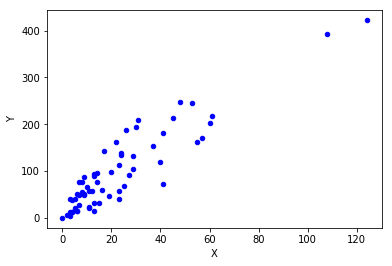

In [5]:
graph = data.plot.scatter(x='X',y='Y',c='Blue')
graph

In [17]:
X = pd.DataFrame(data.X)
y = pd.DataFrame(data.Y)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

print(lm.intercept_)
print(lm.coef_)

[19.99448576]
[[3.41382356]]


In [20]:
X_new = pd.DataFrame({'X': [data.X.min(), data.X.max()]})
X_new.head()

,X
0,0
1,124


In [24]:
preds=lm.predict(X_new)
preds

array([[ 19.99448576],
       [443.30860721]])

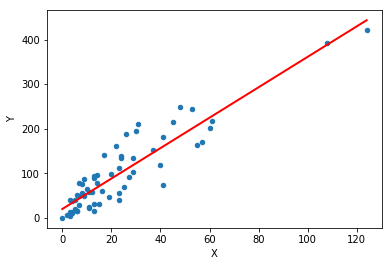

In [29]:
data.plot(kind='scatter', x='X', y='Y')
plt.plot(X_new, preds, c='red', linewidth=2)

In [32]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Y ~ X', data=data).fit()
lm.conf_int()

,0,1
Intercept,7.261369,32.727602
X,3.022966,3.804681


In [33]:
lm.pvalues

Intercept    2.604736e-03
X            2.046638e-25
dtype: float64

In [35]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     305.0
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           2.05e-25
Time:                        23:27:55   Log-Likelihood:                -314.04
No. Observations:                  63   AIC:                             632.1
Df Residuals:                      61   BIC:                             636.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.9945      6.368      3.140      0.003       7.261      32.728
X              3.4138      0.195     17.465      0.000       3.023       3.805
==============================================================================
Omnibus:                        1.613   Durbin-Watson:                   1.199
Prob(Omnibus):                  0.446   Jarque-Bera (JB):                1.429
Skew:                           0.364   Prob(JB):                        0.489
Kurtosis:                       2.875   Cond. No.                         45.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""